In [692]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
 
from sklearn.metrics import confusion_matrix, mean_squared_error
seed = np.random.seed(42)

## 1. Data Visualization

In [693]:
train = pd.read_csv('resources/train.csv')
test = pd.read_csv('resources/test.csv')

In [694]:
categorical_features = train.select_dtypes(include='object').columns.to_list()
numeric_features = train.select_dtypes(include='number').columns.to_list()
features = numeric_features + categorical_features

In [695]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), categorical_features),
    ], verbose=True
)

In [696]:
train_transformed = preprocessor.fit_transform(train)
train_transformed = pd.DataFrame(train_transformed)

[ColumnTransformer] ....... (1 of 2) Processing numeric, total=   0.0s
[ColumnTransformer] ... (2 of 2) Processing categorical, total=   0.0s


In [697]:
train_transformed.head(10)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,0.001371,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,0.002056,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,0.002742,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
5,0.003427,0.176471,0.219178,0.059899,0.444444,0.500,0.876812,0.750000,0.00000,0.129695,...,1.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
6,0.004112,0.000000,0.184932,0.041057,0.777778,0.500,0.956522,0.916667,0.11625,0.242558,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
7,0.004798,0.235294,0.167979,0.042450,0.666667,0.625,0.731884,0.383333,0.15000,0.152197,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
8,0.005483,0.176471,0.102740,0.022529,0.666667,0.500,0.427536,0.000000,0.00000,0.000000,...,5.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
9,0.006169,1.000000,0.099315,0.028605,0.444444,0.625,0.485507,0.000000,0.00000,0.150780,...,1.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


In [698]:
train.iloc[:10, :20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939


In [699]:
train.iloc[:10,20:40]

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA
5,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA
6,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA
7,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA
8,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA
9,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA


In [700]:
train.iloc[:10,40:60]

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0
5,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0
6,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0
7,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0
8,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0
9,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0


In [701]:
train.iloc[:10,60:]

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RFn,2,548,TA,TA,Y,0,61,0,0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,RFn,2,460,TA,TA,Y,298,0,0,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,RFn,2,608,TA,TA,Y,0,42,0,0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,Unf,3,642,TA,TA,Y,0,35,272,0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,RFn,3,836,TA,TA,Y,192,84,0,0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,Unf,2,480,TA,TA,Y,40,30,0,320,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,RFn,2,636,TA,TA,Y,255,57,0,0,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,RFn,2,484,TA,TA,Y,235,204,228,0,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,Unf,2,468,Fa,TA,Y,90,0,205,0,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,RFn,1,205,Gd,TA,Y,0,4,0,0,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 2. Data Preprocessing

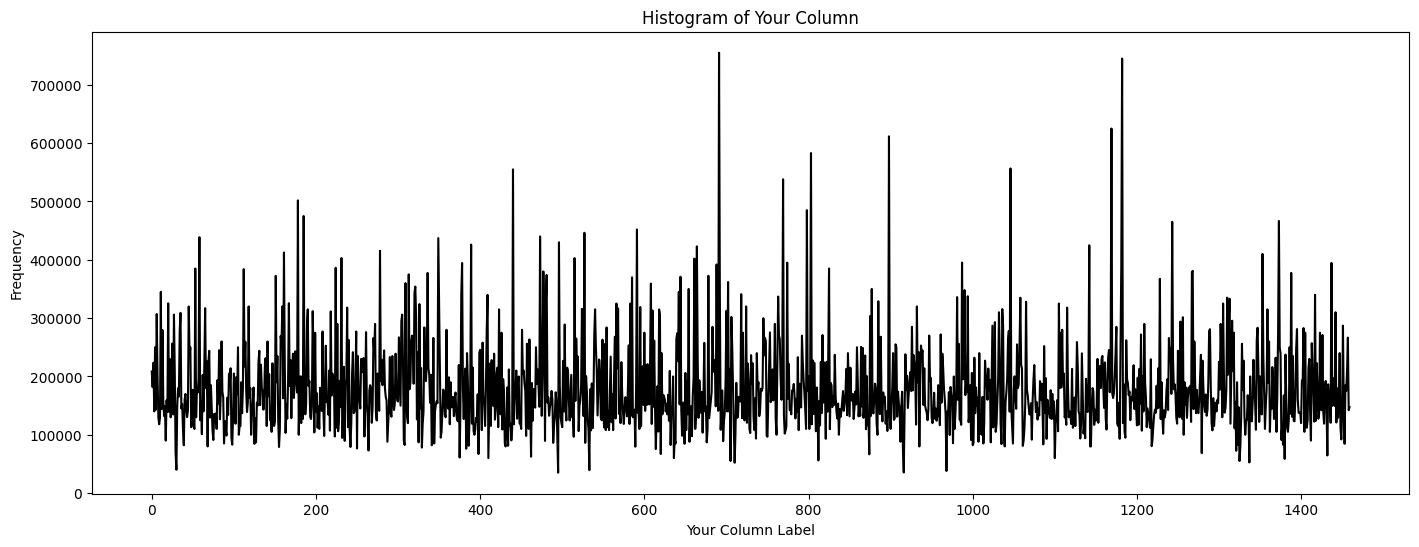

In [702]:
plt.figure(figsize=(17, 6))  
# plt.scatter(range(len(train.index)),train['LotArea'],color='r',s=5)
plt.plot(range(len(train.index)),train['SalePrice'],color='black')
plt.xlabel('Your Column Label')
plt.ylabel('Frequency')
plt.title('Histogram of Your Column')
plt.show()

## 2.2 Corelation Analysis

In [703]:
correlation_matrix = train_transformed.corr()

In [704]:

# correlation_20 = train_transformed.columns[1:21].tolist() + [train_transformed.columns[-1]]
# correlation_40 = train_transformed.columns[21:41].tolist() + [train_transformed.columns[-1]]
# correlation_60 = train_transformed.columns[41:61].tolist() + [train_transformed.columns[-1]]
# correlation_80 = train_transformed.columns[61:81].tolist()

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# sns.heatmap(
#     correlation_matrix.loc[correlation_20, correlation_20],
#     annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
#     xticklabels=correlation_20, yticklabels=correlation_20,
#     ax=axes[0, 0]
# )
# axes[0, 0].set_title('Correlation Matrix (Columns 1-20)')

# sns.heatmap(
#     correlation_matrix.loc[correlation_40, correlation_40],
#     annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
#     xticklabels=correlation_40, yticklabels=correlation_40,
#     ax=axes[0, 1]
# )
# axes[0, 1].set_title('Correlation Matrix (Columns 21-40)')

# sns.heatmap(
#     correlation_matrix.loc[correlation_60, correlation_60],
#     annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
#     xticklabels=correlation_60, yticklabels=correlation_60,
#     ax=axes[1, 0]
# )
# axes[1, 0].set_title('Correlation Matrix (Columns 41-60)')

# sns.heatmap(
#     correlation_matrix.loc[correlation_80, correlation_80],
#     annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
#     xticklabels=correlation_80, yticklabels=correlation_80,
#     ax=axes[1, 1]
# )
# axes[1, 1].set_title('Correlation Matrix (Columns 61-80)')

# plt.tight_layout()
# plt.show()


## 2.3 Feature extraction

In [705]:
last_column_correlations = correlation_matrix.iloc[:-1, -1]
most_correlated_features = last_column_correlations.abs().sort_values(ascending=False).index

In [706]:
train.iloc[:,most_correlated_features[:40]].head()

,LotShape,BsmtUnfSF,Alley,LotArea,MasVnrType,Fireplaces,MasVnrArea,GarageYrBlt,SaleCondition,ExterQual,...,BldgType,Exterior1st,PoolArea,TotRmsAbvGrd,BsmtFinType1,RoofMatl,BedroomAbvGr,KitchenQual,Foundation,OverallCond
0,Reg,150,NaN,8450,BrkFace,0,196.0,2003.0,Normal,Gd,...,1Fam,VinylSd,0,8,GLQ,CompShg,3,Gd,PConc,5
1,Reg,284,NaN,9600,NaN,1,0.0,1976.0,Normal,TA,...,1Fam,MetalSd,0,6,ALQ,CompShg,3,TA,CBlock,8
2,IR1,434,NaN,11250,BrkFace,1,162.0,2001.0,Normal,Gd,...,1Fam,VinylSd,0,6,GLQ,CompShg,3,Gd,PConc,5
3,IR1,540,NaN,9550,NaN,1,0.0,1998.0,Abnorml,TA,...,1Fam,Wd Sdng,0,7,ALQ,CompShg,3,Gd,BrkTil,5
4,IR1,490,NaN,14260,BrkFace,1,350.0,2000.0,Normal,Gd,...,1Fam,VinylSd,0,9,GLQ,CompShg,4,Gd,PConc,5


In [707]:
class TudisFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, features= None, features_no=1):
        self.features = features 
        self.features_no = features_no
       
    def fit(self, X,):
        return self
    
    def transform(self, X):
        if self.features is None:
            correlations = X.corr()['SalePrice']
            print(correlations)
            most_correlated_features = correlations.abs().sort_values(ascending=False).index
            correlated_features = most_correlated_features[:self.features_no]
        else:
            correlated_features = self.features[:,self.features_no]

        print(correlated_features)
        X = train_transformed.iloc[:,correlated_features].to_numpy()
        return X

In [708]:
X_train = train_transformed.iloc[:,most_correlated_features[:20]].to_numpy()

In [709]:
class DropTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.columns_to_drop is not None:
            return X.drop(columns=self.columns_to_drop, errors='ignore')
        else:
            return X

## 3. Model selection

In [710]:
clf = LinearRegression()

## 4. Training and Validation

In [711]:
X_train, X_val, y_train, y_val = train_test_split(X_train, train['SalePrice'].values, test_size=0.2, random_state=seed)

In [712]:
pip = Pipeline([
    ('drop',DropTransformer('Id')),
    ('preprocessor',preprocessor),
    ('extractor',TudisFeatureExtractor(features=most_correlated_features,features_no=20)),
    ('classifier',clf)
])

clf.fit(X_train,y_train)

LinearRegression()

In [713]:
y_pred = clf.predict(X_val)

In [714]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("[rMSE]:\t\t", rmse)

[rMSE]:		 2.4015378917483587e-10


## 4. Metrics

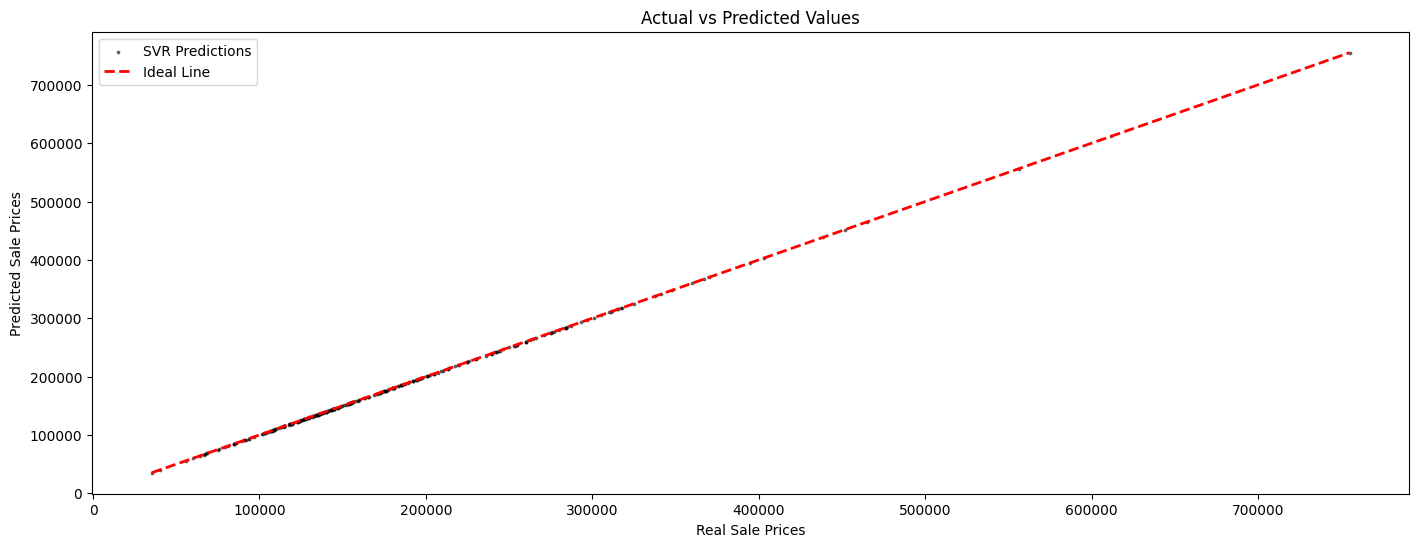

In [715]:
plt.figure(figsize=(17, 6))

plt.scatter(y_val, y_pred, alpha=0.5, label='SVR Predictions',color='black',s=3)
plt.xlabel('Real Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Values')

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2, label='Ideal Line')

plt.legend()
plt.show()

## Test

In [716]:
X_test = preprocessor.transform(test)
test_preds = pip.predict(X_test)

KeyError: "['SalePrice'] not in index"

In [ ]:
plt.figure(figsize=(17, 6))
plt.scatter(range(test_preds), test_preds, alpha=0.5, label='SVR Predictions',color='black',s=3)
plt.show()